In [1]:
from funcoes import *
%load_ext autoreload
%autoreload 2
import geopandas as gpd

In [2]:
anos = range(1985, 2025)
anos_numericos = np.array(anos)  
gdf = gpd.read_file("../input_data/bh_lago_paranoa_31983.geojson")
gdf['uh_label'] = gdf['uh_label'].apply(lambda row: row.split("  ")[-1])
gdf = gdf.sort_values("uh_label")
zonas = gdf['uh_label'].tolist()
print(f"Zonas encontradas: {gdf['uh_label'].tolist()}")  # Assumindo que há uma coluna 'nome'

Zonas encontradas: ['Córrego Bananal', 'Lago Paranoá', 'Riacho Fundo', 'Ribeirão do Gama', 'Ribeirão do Torto']


In [3]:
suffix_name = 'P'
variavel = "Precipitação"

## PARA A BACIA HIDROGRÁFICA TODA

In [4]:
medias, media_geral, stats = calculo_media_bh(anos, suffix_name, gdf)
print(medias.min(), medias.max())
medias


Resultados para P:
- Média geral: 1472.80 mm
- Coeficiente de variação: 15.0%
- Desvio-padrão geral: 73.8
1132.9427 2064.782


array([1627.1097, 1140.4065, 1562.7894, 1539.8085, 1888.7621, 1245.4208,
       1757.4685, 2064.782 , 1304.9575, 1474.5509, 1559.3861, 1239.246 ,
       1578.1556, 1444.3296, 1342.6001, 1519.6161, 1371.4786, 1229.6877,
       1159.6285, 1675.9926, 1721.1781, 1740.6271, 1132.9427, 1670.5953,
       1683.1466, 1315.6562, 1503.6565, 1398.4783, 1578.3755, 1489.0945,
       1287.0698, 1232.3071, 1273.6504, 1592.5267, 1305.1602, 1658.9202,
       1661.0436, 1190.549 , 1156.3774, 1594.549 ], dtype=float32)

In [5]:
anos_validos = stats['anos_processados']
medias_validas = medias
resultados = analise_tendencia(anos_validos, medias_validas, "Bacia do Lago Paranoá")

Análise de Tendência para Bacia do Lago Paranoá (1985-2024)
----------------------------------------
Regressão Linear:
 • Inclinação: -3.55 mm/ano (↓ redução)
 • p-valor: 0.251 (não significativo)
 • R²: 0.03 (explica 3% da variabilidade)
Teste de Mann-Kendall:
 • Tendência: no trend (p=0.322)
 • Sen's Slope: -3.48 mm/ano
Análise por Subperíodos:
 • 1985-1999: -8.13 mm/ano (p=0.609)
 • 2000-2023: -2.38 mm/ano (p=0.684)


In [13]:
#plot_medias_bh_simples(resultados, variavel, suffix_name)

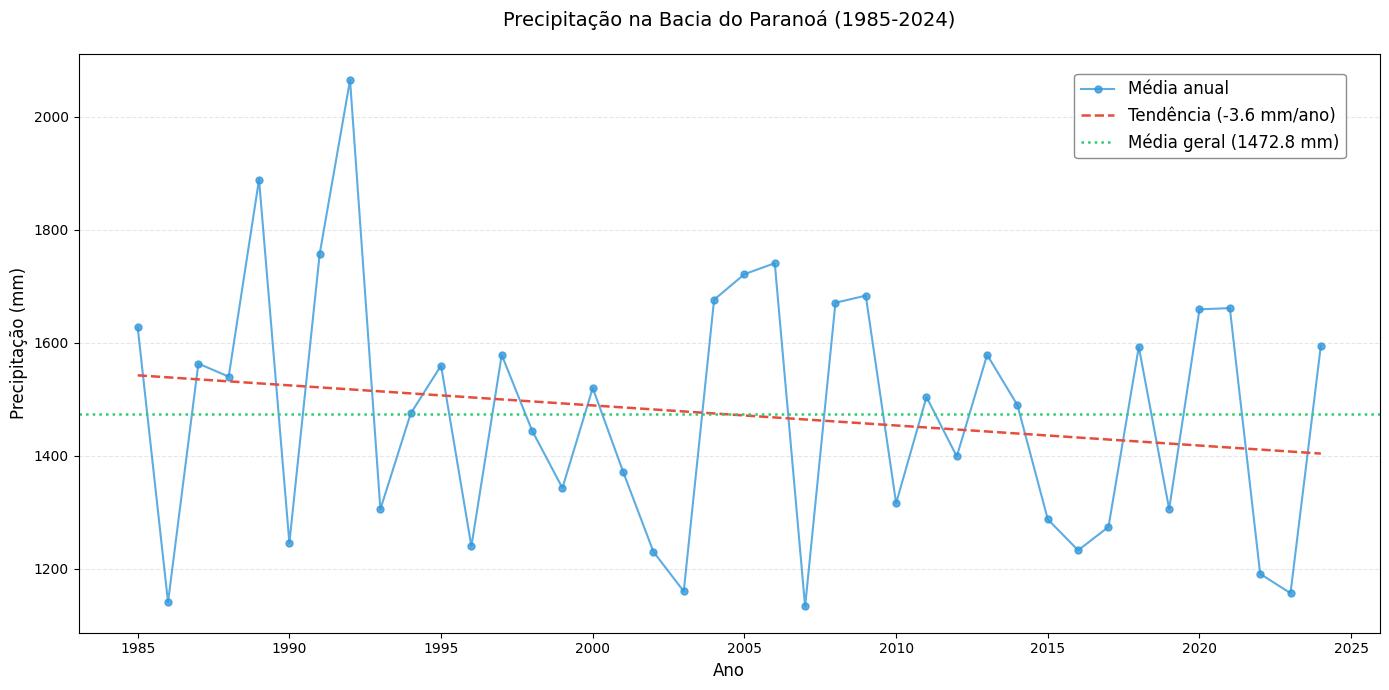

In [14]:
plot_medias_bh(resultados, variavel, suffix_name)

## POR UNIDADE HIDROGRÁFICA

In [6]:
resultados = calcular_medias_zonas_paranoa(gdf, anos, suffix_name, zona_column='uh_label')


=== Estatísticas Descritivas ===
| Zona              |   Média Geral (mm) |   CV (%) |   Variação Anual (±mm) | Anos Processados   |
|:------------------|-------------------:|---------:|-----------------------:|:-------------------|
| Córrego Bananal   |            1471.22 |     14.8 |                   49   | 40/40              |
| Lago Paranoá      |            1452.33 |     15.7 |                   47.9 | 40/40              |
| Riacho Fundo      |            1498.5  |     14.7 |                   64.9 | 40/40              |
| Ribeirão do Gama  |            1481.06 |     15.1 |                   53.4 | 40/40              |
| Ribeirão do Torto |            1475.68 |     15.2 |                   76.8 | 40/40              |

=== Análise de Tendências ===
| Zona              |   Tendência (mm/ano) |   p-valor |   R² |   Sen's Slope | Mann-Kendall       |
|:------------------|---------------------:|----------:|-----:|--------------:|:-------------------|
| Córrego Bananal   |            

In [7]:
resultados = calcular_medias_zonas_paranoa_temp(gdf, anos, suffix_name, zona_column='uh_label')
tendencias = analise_tendencia_por_zona(resultados)

In [8]:
#plot_tendencias_zonas_simples(tendencias, variavel, suffix_name)

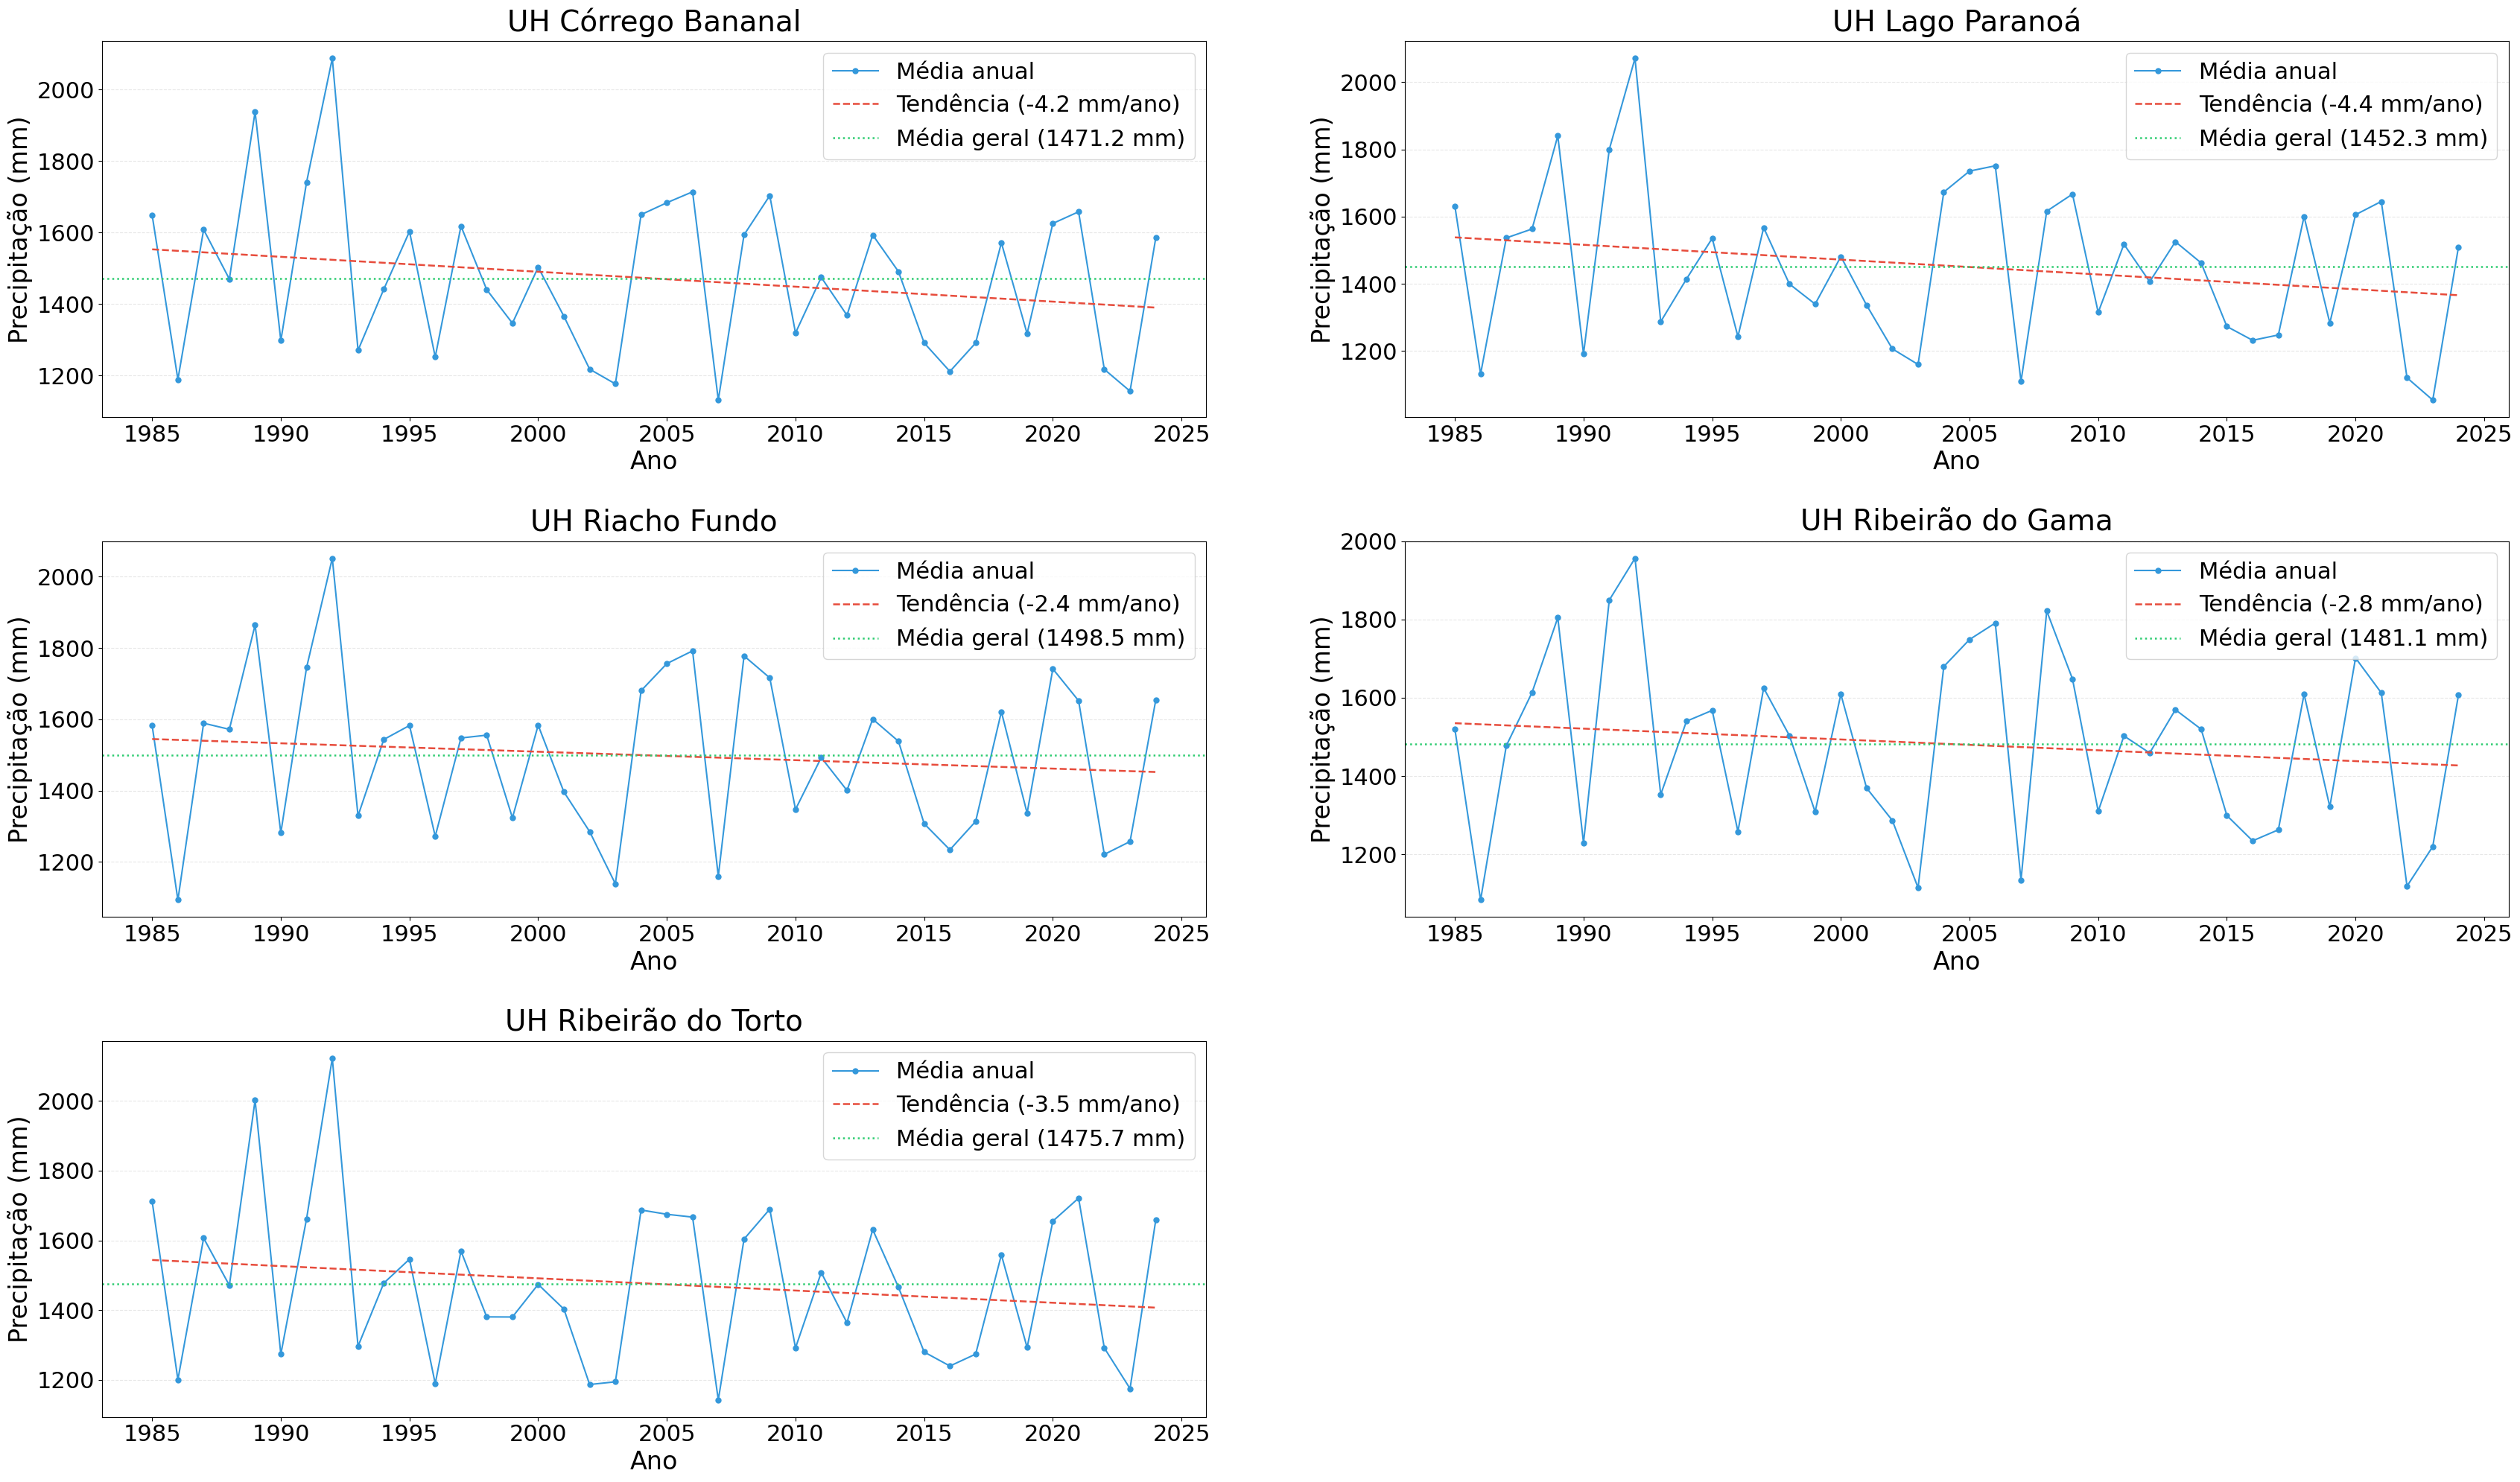

In [9]:
%reload_ext autoreload
plot_tendencias_zonas(tendencias, variavel, suffix_name)